# 06-3 주성분 분석
차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘 중 하나인 PCA(주성분 분석) 모델을 만들어 본다.

## 차원과 차원 축소
- 차원 : 과일 사진의 경우 10000개의 픽셀이 있기 때문에 10000개의 특성이 있는 것과 같다
- 차원축소 : 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류. 차원 축소는 저장 공간을 줄이고 시각화하기 쉽다. 또한 다른 알고리즘의 성능을 높일 수 있다.



## 주성분 분석(PCA)
차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다. 이런 방향을 주성분이라고 부른다.

원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다. 일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다

주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것이다.

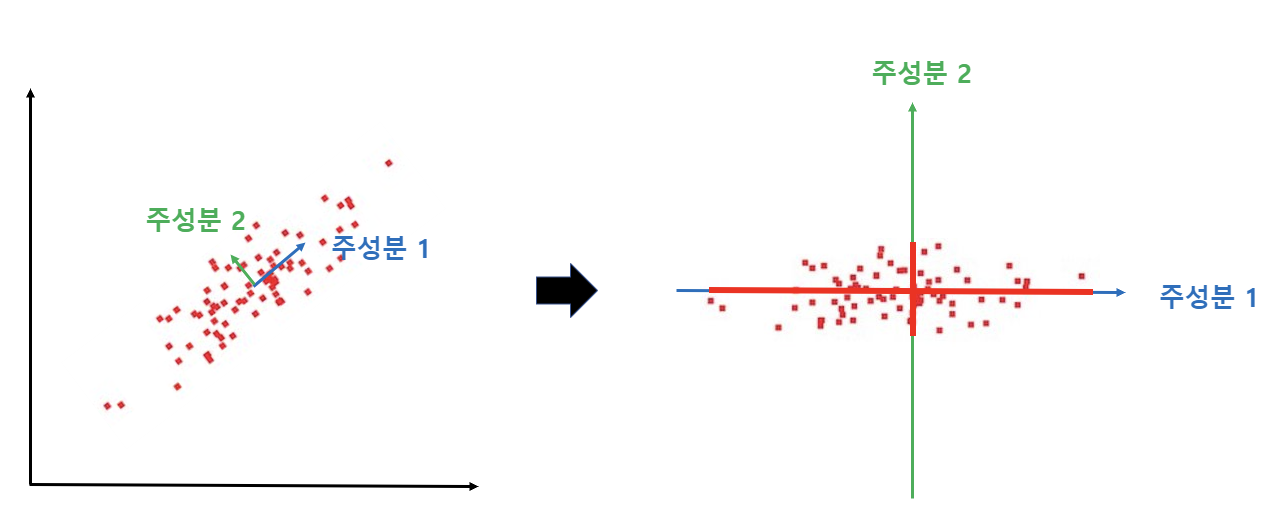

이미지 출처 : https://velog.io/@bonimddal2/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9D

## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)   # (샘플개수, 너비x높이)

--2022-09-30 08:21:35--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-09-30 08:21:35--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-09-30 08:21:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # n_components 매개변수에 주성분의 개수를 지정해야 한다
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
print(pca.components_.shape)

(50, 10000)


In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)    # n은 샘플 개수
  # 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산한다
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개까지만 그림
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

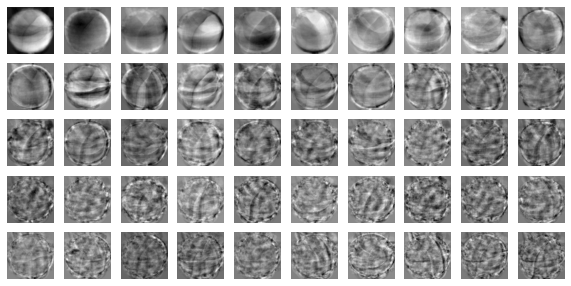

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.
# 주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다.
# 이는 마치 원본 데이터를 각 주성분으로 분해한 것으로 생각할 수 있다.

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d) # PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄임
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


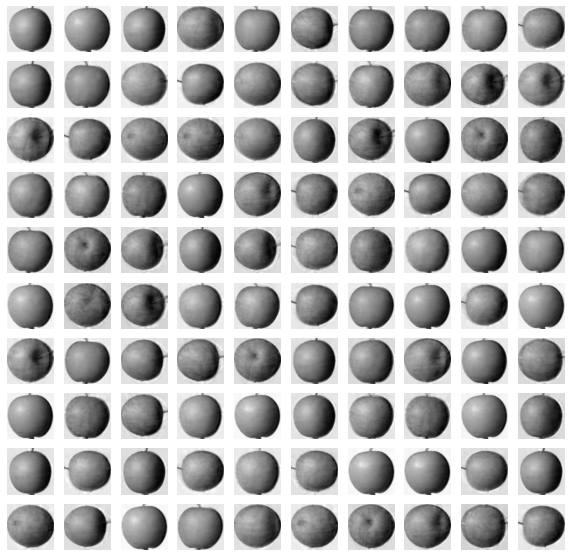

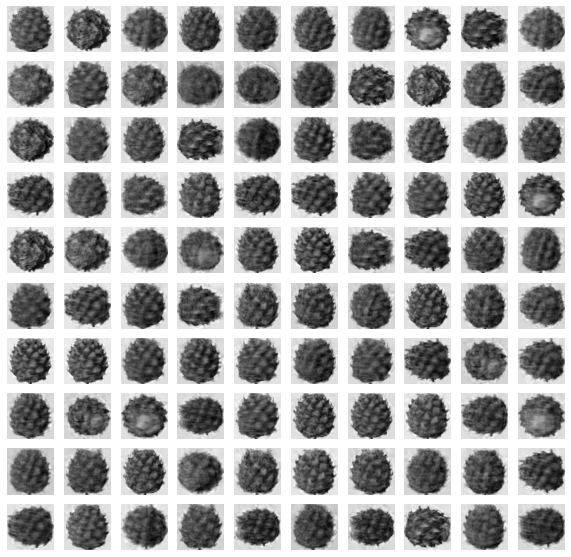

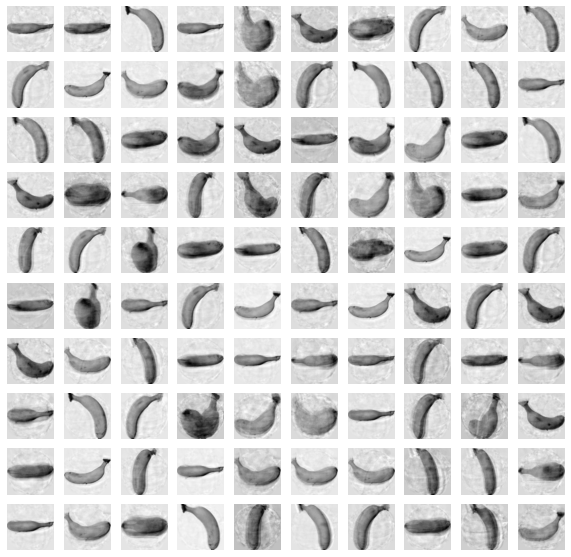

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

# 거의 모든 과일이 잘 복원되었다. 일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10000개로 늘린 것을 감안한다면 놀라운 일이다.
# 이는 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다. 그럼 50개의 특성은 얼마나 분산을 보존하고 있는걸까?

## 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.

In [10]:
print(np.sum(pca.explained_variance_ratio_))
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음.
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음.

0.9214555165540232


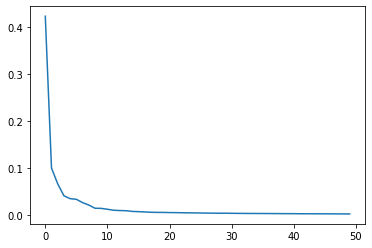

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기
이번에는 PCA로 차원 축소된 데이터를 사용하여 지도 학습 모델을 훈련한다.

원본 데이터를 사용했을 때와 어떤 차이가 있는지 확인해보자.

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [14]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.1229153633117677


In [15]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 50개의 특성만 사용했는데도 정확도가 100%이고 훈련 시간은 0.03초로 20배 이상 감소했음
# PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있음.

1.0
0.049314117431640624


In [16]:
pca = PCA(n_components=0.5)   # 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만듦
pca.fit(fruits_2d)

print(pca.n_components_)      # 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.

2


In [17]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 2)


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 2개의 특성만 사용했는데도 정확도가 99%

0.99
0.03589596748352051


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


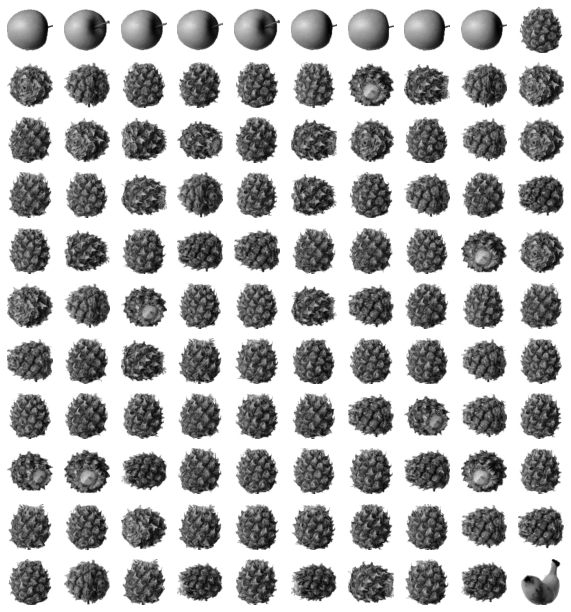

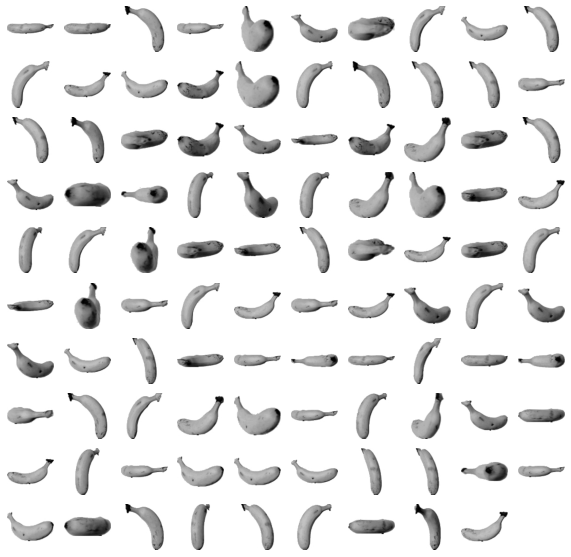

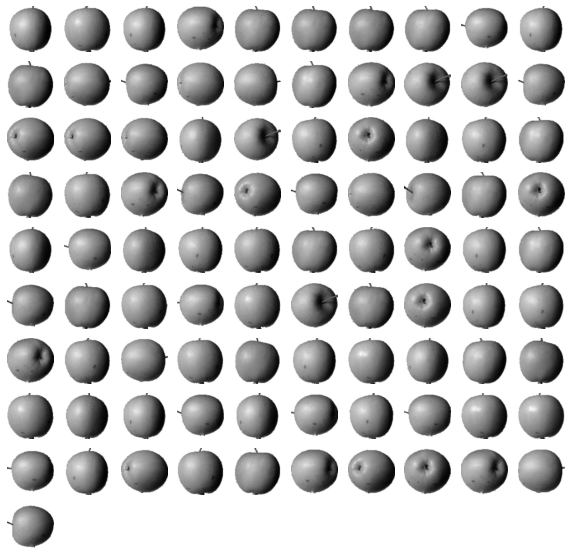

In [20]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

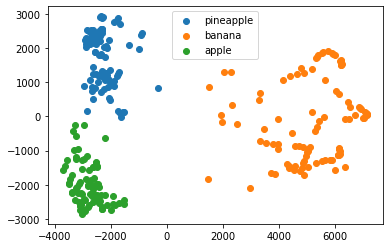

In [21]:
# 훈련 데이터의 차원을 줄이면(3개 이하로) 시각화하기 편함
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()